# Motorization Rate in France

## Goals

**Predict the car equipment rate at the municipality level using the second dataset** 

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df_TM = pd.read_excel('data/Taux_de_motorisation_a_lIRIS-Global_Map_Solution.xlsx')
df_TM.head()

,Code IRIS,Nom IRIS,Code Commune,Nom Commune,Taux de motorisation IRIS,Taux de motorisation Commune,Taux de motorisation Département
0,010010000,L'Abergement-Clémenciat,01001,L'Abergement-Clémenciat,0.963576,0.963576,0.903721
1,010020000,L'Abergement-de-Varey,01002,L'Abergement-de-Varey,0.950495,0.950495,0.903721
2,010040101,Ambérieu-en-Bugey / Les Perouses-Triangle d'Ac...,01004,Ambérieu-en-Bugey,0.781567,0.854474,0.903721
3,010040102,Ambérieu-en-Bugey / Longeray-Gare,01004,Ambérieu-en-Bugey,0.816198,0.854474,0.903721
4,010040201,Ambérieu-en-Bugey / Centre-St Germain-Vareilles,01004,Ambérieu-en-Bugey,0.816397,0.854474,0.903721


We will just keep our target and the code of each Commune

In [105]:
df_TM[['Code Commune', 'Taux de motorisation Commune']]

,Code Commune,Taux de motorisation Commune
0,01001,0.963576
1,01002,0.950495
2,01004,0.854474
3,01004,0.854474
4,01004,0.854474
5,01004,0.854474
6,01005,0.954693
7,01006,0.886792
8,01007,0.935798
9,01008,0.954545


We now access the dataset with a lot of features concerning Commune but also whole Departments

In [106]:
df_mdb = pd.read_excel('data/MDB-INSEE-V2.xls')
df_mdb.head()

WARNING *** file size (57125979) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,CODGEO,Nb Pharmacies et parfumerie,Dynamique Entrepreneuriale,Dynamique Entrepreneuriale Service et Commerce,Synergie Médicale COMMUNE,Orientation Economique,Indice Fiscal Partiel,Score Fiscal,Indice Evasion Client,Score Evasion Client,...,Score Croissance Entrepreneuriale,Score VA Région,Score PIB,Environnement Démographique,Fidélité,SYN MEDICAL,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,CP
0,01001,0.0,57.0,23.0,114,Bassin Industriel,101.93878,59.04139,0.00000,0.00000,...,0.01585,32.42578,33.83811,Bassin Industriel en croissance démographique,Pop Sédentaire,Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
1,01002,0.0,45.0,4.0,143,Bassin Résidentiel,101.93878,59.04139,0.00000,0.00000,...,0.00173,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Sédentaire,Forte Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
2,01004,0.0,634.0,828.0,366,Bassin Résidentiel,101.93878,59.04139,248.45549,0.10621,...,0.38471,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01
3,01005,0.0,113.0,62.0,132,Bassin Urbain,101.93878,59.04139,248.45549,0.10621,...,0.02824,32.42578,33.83811,Bassin Urbain en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Moyenne dynamique,Faible Dynamique Serv et Com,01
4,01006,0.0,42.0,1.0,121,Bassin Résidentiel,101.93878,59.04139,0.00000,0.00000,...,0.00000,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Sédentaire,Forte Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01


In [107]:
df_mdb.columns.tolist()

['CODGEO',
 'Nb Pharmacies et parfumerie',
 'Dynamique Entrepreneuriale',
 'Dynamique Entrepreneuriale Service et Commerce',
 'Synergie Médicale COMMUNE',
 'Orientation Economique',
 'Indice Fiscal Partiel',
 'Score Fiscal',
 'Indice Evasion Client',
 'Score Evasion Client',
 'Indice Synergie Médicale',
 'Score Synergie Médicale',
 'SEG Croissance POP',
 'LIBGEO',
 'REG',
 'DEP',
 'Nb Omnipraticiens BV',
 'Nb Infirmiers Libéraux BV',
 'Nb dentistes Libéraux BV',
 'Nb pharmaciens Libéraux BV',
 'Densité Médicale BV',
 'Score équipement de santé BV',
 'Indice Démographique',
 'Score Démographique',
 'Indice Ménages',
 'Score Ménages',
 'Population',
 'Evolution Population',
 'Evolution Pop %',
 'Nb Ménages',
 'Nb Résidences Principales',
 'Nb propriétaire',
 'Nb Logement',
 'Nb Résidences Secondaires',
 'Nb Log Vacants',
 'Nb Occupants Résidence Principale',
 'Nb Femme',
 'Nb Homme',
 'Nb Mineurs',
 'Nb Majeurs',
 'Nb Etudiants',
 'Nb Entreprises Secteur Services',
 'Nb Entreprises Secte

### Merge

In [108]:
df = df_TM[['Code Commune', 'Taux de motorisation Commune']].merge(right=df_mdb, left_on='Code Commune', right_on='CODGEO')
df.head()

,Code Commune,Taux de motorisation Commune,CODGEO,Nb Pharmacies et parfumerie,Dynamique Entrepreneuriale,Dynamique Entrepreneuriale Service et Commerce,Synergie Médicale COMMUNE,Orientation Economique,Indice Fiscal Partiel,Score Fiscal,...,Score Croissance Entrepreneuriale,Score VA Région,Score PIB,Environnement Démographique,Fidélité,SYN MEDICAL,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,CP
0,01001,0.963576,01001,0.0,57.0,23.0,114,Bassin Industriel,101.93878,59.04139,...,0.01585,32.42578,33.83811,Bassin Industriel en croissance démographique,Pop Sédentaire,Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
1,01002,0.950495,01002,0.0,45.0,4.0,143,Bassin Résidentiel,101.93878,59.04139,...,0.00173,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Sédentaire,Forte Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
2,01004,0.854474,01004,0.0,634.0,828.0,366,Bassin Résidentiel,101.93878,59.04139,...,0.38471,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01
3,01004,0.854474,01004,0.0,634.0,828.0,366,Bassin Résidentiel,101.93878,59.04139,...,0.38471,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01
4,01004,0.854474,01004,0.0,634.0,828.0,366,Bassin Résidentiel,101.93878,59.04139,...,0.38471,32.42578,33.83811,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01


In [109]:
len(df_TM), len(df), df.duplicated().sum()

(50153, 48571, 12057)

In [110]:
df_mdb.duplicated().sum(), df_TM.duplicated().sum()

(0, 0)

In [111]:
df_mdb['CODGEO'].nunique()

36677

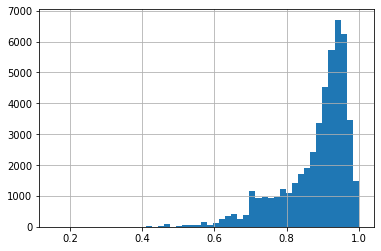

In [112]:
df['Taux de motorisation Commune'].hist(bins=50)

The overall motorization rate is pretty high, with the majority of Communes being aroung 90%

The **Urbanité Ruralité** feature looks interesting, lets explore it 

In [113]:
import seaborn as sns

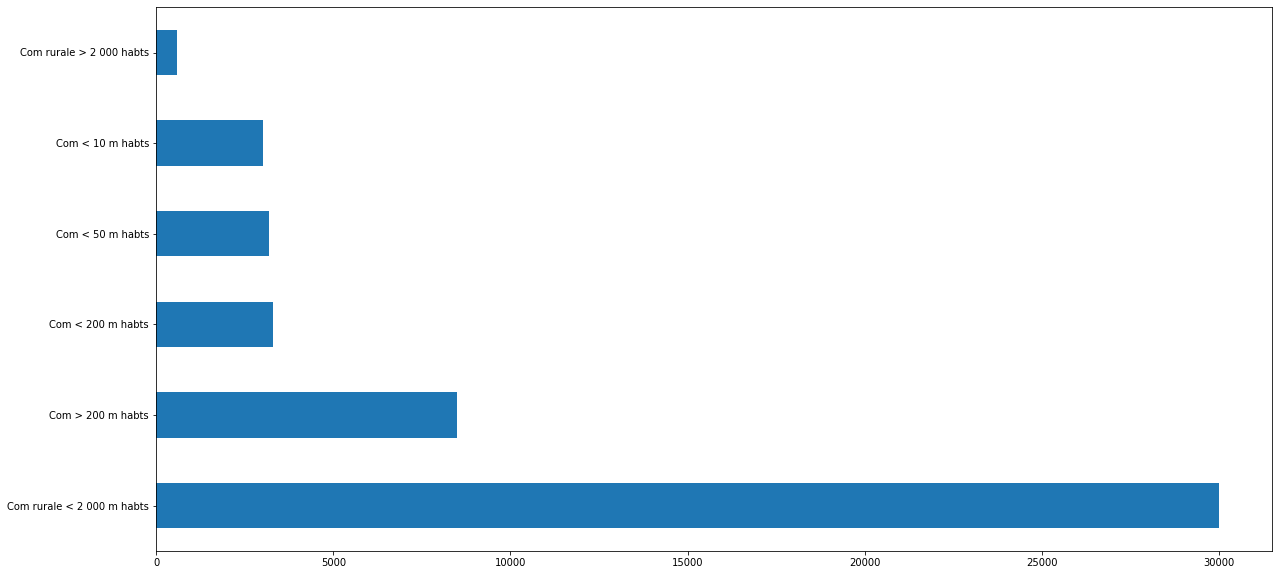

In [114]:
import matplotlib.pyplot as plt
df['Urbanité Ruralité'].value_counts().plot(kind='barh', figsize=(20,10))

Needs transformation, the last category proabably contains the other ones, we surelay want to separate

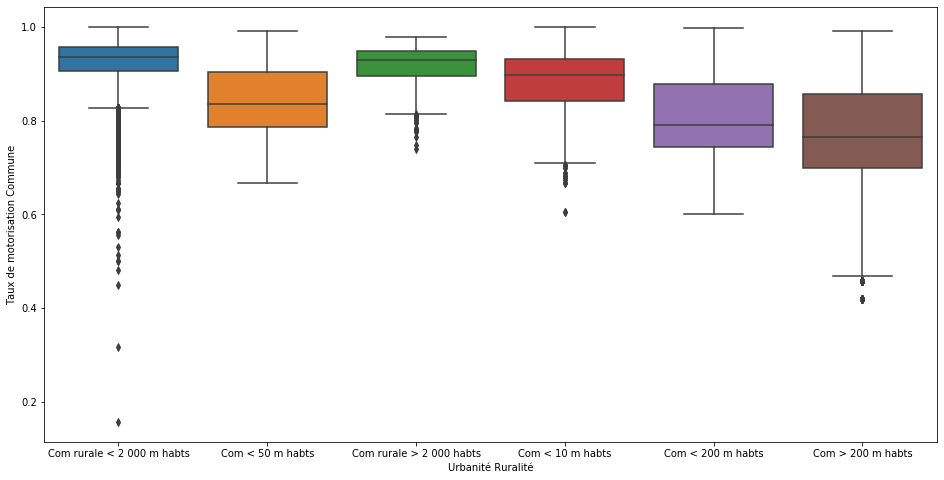

In [115]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='Urbanité Ruralité', y='Taux de motorisation Commune', data=df)
#ax = sns.swarmplot(x='Urbanité Ruralité', y='Taux de motorisation Commune', data=df, color="grey")

Indeed, Com rurale < 2000 m habitants has a lot of outliers, because those should belong exclusively to other categories.

We can't just look at each feature and try to see with it's worth to keep, we better try to select a set of them which will provide a good prediction

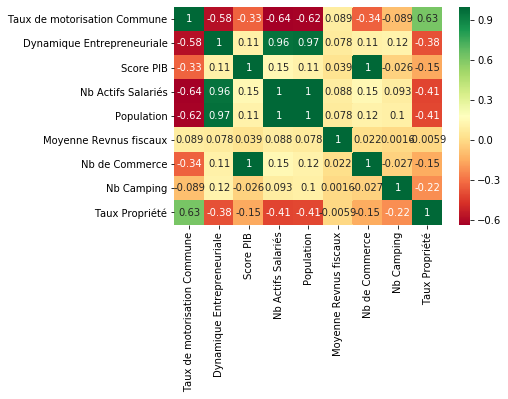

In [116]:
g = sns.heatmap(df[['Taux de motorisation Commune', 'Dynamique Entrepreneuriale', 'Score PIB', 'Nb Actifs Salariés', 'Population', 'Moyenne Revnus fiscaux', 'Nb de Commerce', 'Nb Camping', 'Taux Propriété']].corr(),annot=True,cmap="RdYlGn")

### Lot of features, which ones actually matter ?

#### We are going to try several feature selection methods and then compare wich features each methode would keep

In [117]:
num_cols = df._get_numeric_data().columns.tolist()
num_cols

['Taux de motorisation Commune',
 'Nb Pharmacies et parfumerie',
 'Dynamique Entrepreneuriale',
 'Dynamique Entrepreneuriale Service et Commerce',
 'Synergie Médicale COMMUNE',
 'Indice Fiscal Partiel',
 'Score Fiscal',
 'Indice Evasion Client',
 'Score Evasion Client',
 'Indice Synergie Médicale',
 'Score Synergie Médicale',
 'REG',
 'Nb Omnipraticiens BV',
 'Nb Infirmiers Libéraux BV',
 'Nb dentistes Libéraux BV',
 'Nb pharmaciens Libéraux BV',
 'Densité Médicale BV',
 'Score équipement de santé BV',
 'Indice Démographique',
 'Score Démographique',
 'Indice Ménages',
 'Score Ménages',
 'Population',
 'Evolution Population',
 'Evolution Pop %',
 'Nb Ménages',
 'Nb Résidences Principales',
 'Nb propriétaire',
 'Nb Logement',
 'Nb Résidences Secondaires',
 'Nb Log Vacants',
 'Nb Occupants Résidence Principale',
 'Nb Femme',
 'Nb Homme',
 'Nb Mineurs',
 'Nb Majeurs',
 'Nb Etudiants',
 'Nb Entreprises Secteur Services',
 'Nb Entreprises Secteur Commerce',
 'Nb Entreprises Secteur Construc

In [118]:
cols = df.columns.tolist()

In [119]:
cat_cols = [col for col in cols if col not in num_cols]
cat_cols

['Code Commune',
 'CODGEO',
 'Orientation Economique',
 'SEG Croissance POP',
 'LIBGEO',
 'DEP',
 'Urbanité Ruralité',
 'Dynamique Démographique BV',
 'SEG Environnement Démographique Obsolète',
 'Environnement Démographique',
 'Fidélité',
 'SYN MEDICAL',
 'Seg Cap Fiscale',
 'Seg Dyn Entre',
 'DYN SetC',
 'CP']

In [120]:
len(df.columns), len(num_cols), len(cat_cols)

(103, 87, 16)

In [121]:
del df['CODGEO']

In [122]:
df.columns[df.isna().any()].tolist()

['Taux de motorisation Commune',
 'Nb Pharmacies et parfumerie',
 'Dynamique Entrepreneuriale',
 'Dynamique Entrepreneuriale Service et Commerce',
 'Nb Entreprises Secteur Services',
 'Nb Entreprises Secteur Commerce',
 'Nb Entreprises Secteur Construction',
 'Nb Entreprises Secteur Industrie',
 'Nb Création Enteprises',
 'Nb Création Industrielles',
 'Nb Création Construction',
 'Nb Création Commerces',
 'Nb Création Services',
 'Nb Atifs',
 'Nb Actifs Salariés',
 'Nb Actifs Non Salariés',
 'Nb Education, santé, action sociale',
 'Nb Services personnels et domestiques',
 'Nb Santé, action sociale',
 'Score Croissance Entrepreneuriale',
 'Seg Dyn Entre',
 'DYN SetC']

### Pearson Correlation

We can use the correlation between a feature and our target to see if a link exists

In [141]:
df_ = df.copy()
df_ = df_.dropna()

X = df_[num_cols]
X = X.drop(columns=['Taux de motorisation Commune']) #features
y = df_['Taux de motorisation Commune'] #target

num_feats = 20


def cor_selector(X, y,num_feats):
    
    cor_list = []
    feature_name = X.columns.tolist()
    
    for i in feature_name:
        
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    cor_list = [0 if np.isnan(i) else i for i in cor_list] # replace NaN with 0 just in case   
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist() #take the most abs correlate features
    
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

20 selected features


### Recursive Feature Elimination

In [124]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

In [125]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=10, verbose=5)

rfe_selector.fit(X_norm, y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 86 features.
Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
20 selected features


### Random Forest

In [126]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_reg = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=num_feats)
embeded_rf_reg.fit(X, y)

embeded_rf_support = embeded_rf_reg.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


### King XGBOOST

In [127]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

xgb = XGBRegressor()
embeded_xgb_selector = SelectFromModel(xgb, max_features=num_feats)
embeded_xgb_selector.fit(X, y)

embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X.loc[:,embeded_xgb_support].columns.tolist()

print(str(len(embeded_xgb_feature)), 'selected features')

C:\Users\Adrien\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Adrien\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:11:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
14 selected features


### Recap Numerical Data

In [128]:
feature_name = X.columns.tolist()

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'RFE':rfe_support ,'Random Forest':embeded_rf_support, 'XGBOOST':embeded_xgb_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,RFE,Random Forest,XGBOOST,Total
1,Taux Propriété,True,False,True,True,3
2,Score Urbanité,True,False,True,True,3
3,Moyenne Revnus fiscaux,False,True,True,True,3
4,Evolution Population,True,False,True,True,3
5,Synergie Médicale COMMUNE,True,True,False,False,2
6,Score Ménages,True,True,False,False,2
7,REG,False,False,True,True,2
8,Population,True,True,False,False,2
9,Nb Occupants Résidence Principale,True,False,False,True,2
10,Nb Log Vacants,False,False,True,True,2


4 features were chosen 3 times, we could decide to continue without the others. But let us check if they are not too much correlated

In [129]:
print('Taux Propriété')
print('\n')

print(df[['Taux Propriété', 'Score Urbanité']].corr())
print(df[['Taux Propriété', 'Moyenne Revnus fiscaux']].corr())
print(df[['Taux Propriété', 'Evolution Population']].corr())

print('\n')
print('Score Urbanité')
print('\n')

print(df[['Moyenne Revnus fiscaux', 'Score Urbanité']].corr())
print(df[['Evolution Population', 'Score Urbanité']].corr())

print('\n')
print('Evolution Population')
print('\n')

print(df[['Moyenne Revnus fiscaux', 'Evolution Population']].corr())

Taux Propriété


                Taux Propriété  Score Urbanité
Taux Propriété        1.000000       -0.381252
Score Urbanité       -0.381252        1.000000
                        Taux Propriété  Moyenne Revnus fiscaux
Taux Propriété                1.000000               -0.005941
Moyenne Revnus fiscaux       -0.005941                1.000000
                      Taux Propriété  Evolution Population
Taux Propriété              1.000000             -0.402021
Evolution Population       -0.402021              1.000000


Score Urbanité


                        Moyenne Revnus fiscaux  Score Urbanité
Moyenne Revnus fiscaux                1.000000        0.010345
Score Urbanité                        0.010345        1.000000
                      Evolution Population  Score Urbanité
Evolution Population              1.000000        0.542114
Score Urbanité                    0.542114        1.000000


Evolution Population


                        Moyenne Revnus fiscaux  Evolution Populati

There is not strong correlation between those features, max is 0.5

### Now lets deal with the categorical data

In [130]:
cat_cols

['Code Commune',
 'CODGEO',
 'Orientation Economique',
 'SEG Croissance POP',
 'LIBGEO',
 'DEP',
 'Urbanité Ruralité',
 'Dynamique Démographique BV',
 'SEG Environnement Démographique Obsolète',
 'Environnement Démographique',
 'Fidélité',
 'SYN MEDICAL',
 'Seg Cap Fiscale',
 'Seg Dyn Entre',
 'DYN SetC',
 'CP']

In [131]:
cat_cols.remove('CODGEO')
cat_cols.remove('DEP')
cat_cols.remove('LIBGEO')

In [132]:
df_ = df.copy()
df_ = df_.dropna()

categorical_data = df_[cat_cols]

In [133]:
categorical_data.head()

,Code Commune,Orientation Economique,SEG Croissance POP,Urbanité Ruralité,Dynamique Démographique BV,SEG Environnement Démographique Obsolète,Environnement Démographique,Fidélité,SYN MEDICAL,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,CP
0,01001,Bassin Industriel,en croissance démographique,Com rurale < 2 000 m habts,1.Accroissement par excédent naturel et migrat...,Zone rurale en croissance démographique,Bassin Industriel en croissance démographique,Pop Sédentaire,Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
1,01002,Bassin Résidentiel,en croissance démographique,Com rurale < 2 000 m habts,1.Accroissement par excédent naturel et migrat...,Zone rurale en croissance démographique,Bassin Résidentiel en croissance démographique,Pop Sédentaire,Forte Synergie Médicale,Fiscalité moyenne,Faible dynamique,Faible Dynamique Serv et Com,01
2,01004,Bassin Résidentiel,en croissance démographique,Com < 50 m habts,1.Accroissement par excédent naturel et migrat...,Zone rurale en croissance démographique,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01
3,01004,Bassin Résidentiel,en croissance démographique,Com < 50 m habts,1.Accroissement par excédent naturel et migrat...,Zone rurale en croissance démographique,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01
4,01004,Bassin Résidentiel,en croissance démographique,Com < 50 m habts,1.Accroissement par excédent naturel et migrat...,Zone rurale en croissance démographique,Bassin Résidentiel en croissance démographique,Pop Mobile,Forte Synergie Médicale,Fiscalité moyenne,Dynamique Economique,Bonne Dynamique Entreprise Serv et Com,01


In [134]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
categorical_data_encoded.head(5)

,Code Commune,Orientation Economique,SEG Croissance POP,Urbanité Ruralité,Dynamique Démographique BV,SEG Environnement Démographique Obsolète,Environnement Démographique,Fidélité,SYN MEDICAL,Seg Cap Fiscale,Seg Dyn Entre,DYN SetC,CP
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,0,1,1,1,0,1,1,0
3,2,1,0,1,0,0,1,1,1,0,1,1,0
4,2,1,0,1,0,0,1,1,1,0,1,1,0


In [135]:
#categorical_data_encoded[cat_cols] = pd.Categorical(categorical_data_encoded[cat_cols])

In [136]:
len(y), len(categorical_data_encoded)

(48550, 48550)

In [142]:
X = categorical_data_encoded

num_feats = 5

#Person

cor_support, cor_feature = cor_selector(X, y, num_feats)

#RFE

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=10, verbose=5)

rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

#RF

embeded_rf_reg = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=num_feats)
embeded_rf_reg.fit(X, y)

embeded_rf_support = embeded_rf_reg.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

#XGB

xgb = XGBRegressor()
embeded_xgb_selector = SelectFromModel(xgb, max_features=num_feats)
embeded_xgb_selector.fit(X, y)

embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X.loc[:,embeded_xgb_support].columns.tolist()

Fitting estimator with 13 features.


C:\Users\Adrien\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Adrien\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:15:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Recap cat

In [143]:
feature_name = X.columns.tolist()

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'RFE':rfe_support ,'Random Forest':embeded_rf_support, 'XGBOOST':embeded_xgb_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,RFE,Random Forest,XGBOOST,Total
1,DYN SetC,True,True,True,True,4
2,Fidélité,True,True,False,True,3
3,Urbanité Ruralité,True,False,False,True,2
4,Seg Dyn Entre,True,False,False,False,1
5,SEG Environnement Démographique Obsolète,True,False,False,False,1


Looks like the first feature convinced everyone, we could also keep the second one.

# TODO

- train several models on selected features with hyperparameters tuning
- voting?